# MLFlow step by step 


## 1. creating experiments

In [1]:
import mlflow

mlflow.create_experiment(
    name='testing-mlflow4',
    artifact_location='testing_mlflow1_artifacts',  # ml workflow 
    tags={'env':'dev','version':'1.0.0'}            #
)

'773410609055695727'

In [2]:
# wrapper function to create mlflow experiment 
from typing import Any 
def create_mlflow_experiment(experiment_name:str,artifact_location:str,tags:dict[str,Any])-> str:
    ''' 
    Create a new mlflow experiment with the given name and artifact location
    '''
    try:
        experiment_id=mlflow.create_experiment(
            name=experiment_name, artifact_location=artifact_location,tags=tags
        )
    except:
        print(f'Experiment {experiment_name} already exists')
        experiment_id=mlflow.get_experiment_by_name(experiment_name).experiment_id
    return experiment_id

In [3]:
create_mlflow_experiment('testing-mlflow','testing_mlflow1_artifacts',{'env':'prod','version':'2.0.0'})

'990925180578863486'

## 2. Retrieving info on existing experiments

In [4]:
import mlflow.entities


def get_mlflow_experiment(experiment_id:str=None,experiment_name:str=None)-> mlflow.entities.Experiment:
    ''' 
    Retrieve the mlflow experiment with the given id or name 
    Paramters:
    experiment_id: str
        The id of the experiment to retieve
    experiment_name: str
        The name of the experiment to retrieve
    
        Returns:
        experiment:mlflow.entities.Experiment
            The mlflow experiment with the given id or name
    '''
    if experiment_id is not None:
        experiment=mlflow.get_experiment(experiment_id)
    elif experiment_name is not None:
        experiment=mlflow.get_experiment_by_name(experiment_name)
    else:
        raise ValueError('Either experiment_id or experiment_name must be provided')
    return experiment

In [6]:
## 2. Retrieving info on existing experiments


experiment=get_mlflow_experiment(experiment_name='testing-mlflow')
print(f'Name : {experiment.name}')
print(f'Experiment_id : {experiment.experiment_id}')
print(f'Artifact Location : {experiment.artifact_location}')
print(f'Tags : {experiment.tags}')
print(f'Lifecycle_stage : {experiment.lifecycle_stage}')
print(f'Creation timestamp: : {experiment.creation_time}')

Name : testing-mlflow
Experiment_id : 990925180578863486
Artifact Location : file:///d:/pythonProjects/MLOps_Krish_Naik/MLflow/step-by-step/testing_mlflow1_artifacts
Tags : {'env': 'prod', 'version': '2.0.0'}
Lifecycle_stage : active
Creation timestamp: : 1734999028643


# 3. Delete Experiment 

In [8]:
#mlflow.delete_experiment(experiment_id='897722527704922899')

# 4. Mlflow runs to train the ml models

In [9]:
mlflow.set_experiment('run_test')
with mlflow.start_run():
    mlflow.log_param('learning_rate',0.05)


2024/12/23 18:10:54 INFO mlflow.tracking.fluent: Experiment with name 'run_test' does not exist. Creating a new experiment.


In [10]:
# method 2 

with mlflow.start_run(run_name='mlflow_run'):
    mlflow.log_param('learning_rate',0.06)

In [11]:
# method 3 with run info
with mlflow.start_run(run_name='mlflow_run') as run:
    mlflow.log_param('learning_rate',0.06)
    print(f'runID: {run.info.run_id}')
    print(f'run info: {run.info}')

runID: f83e66bbcf984baa9d1aaceb1a18898d
run info: <RunInfo: artifact_uri='file:///d:/pythonProjects/MLOps_Krish_Naik/MLflow/step-by-step/mlruns/828504590665159851/f83e66bbcf984baa9d1aaceb1a18898d/artifacts', end_time=None, experiment_id='828504590665159851', lifecycle_stage='active', run_id='f83e66bbcf984baa9d1aaceb1a18898d', run_name='mlflow_run', run_uuid='f83e66bbcf984baa9d1aaceb1a18898d', start_time=1734999055951, status='RUNNING', user_id='Immortal_Pi'>


In [12]:
# create and run mlflow experiment 

experiment_id=create_mlflow_experiment(
    experiment_name='testing_mlflow3',
    artifact_location='testing_mlflow3_artifacts',
    tags={'env':'dev','version':'1.0.2'}
)

mlflow.set_experiment(experiment_id=experiment_id)
with mlflow.start_run(run_name='testing') as run:
    mlflow.log_param('learning_rate',0.01)
    print(f'run_id : {run.info.run_id}')
    print(f'experiment_id : {run.info.experiment_id}')
    print(f'status: {run.info.status}')
    print(f'start Time: {run.info.start_time}')
    print(f'end Time : {run.info.end_time}')
    print(f'lifecycle_stage : {run.info.lifecycle_stage}')

run_id : 233d161d809e43a7a6a70b340f9f5019
experiment_id : 285179736425148203
status: RUNNING
start Time: 1734999056836
end Time : None
lifecycle_stage : active


# 5. log parameters

In [13]:
mlflow.set_experiment(experiment_name='logging_experiment')
with mlflow.start_run(run_name='logging_parameters') as run:
    mlflow.log_param('learning_rate',0.01)

    parameters={
        'learning_rate':0.01,
        'epochs':10,
        'batch_size':100,
        'loss_function':'mse',
        'optimizer':'adam'
    }

    mlflow.log_params(parameters)

    #print run info
    print(f'run_id : {run.info.run_id}')
    print(f'experiment_id : {run.info.experiment_id}')
    print(f'status: {run.info.status}')
    print(f'start Time: {run.info.start_time}')
    print(f'end Time : {run.info.end_time}')
    print(f'lifecycle_stage : {run.info.lifecycle_stage}')



2024/12/23 18:11:05 INFO mlflow.tracking.fluent: Experiment with name 'logging_experiment' does not exist. Creating a new experiment.


run_id : 78d7de7f821b40f48681bb7b9ca343a4
experiment_id : 637476786088063623
status: RUNNING
start Time: 1734999065151
end Time : None
lifecycle_stage : active


# 6. logging metrics

In [16]:
mlflow.set_experiment(experiment_name='logging_experiment')
with mlflow.start_run(run_name='logging_metrics') as run:
    mlflow.log_param('learning_rate2',0.01)
    mlflow.log_params(parameters)
    metrics={
        'mse':0.01,
        'mae':0.01,
        'rmse':0.01,
        'r2':0.01

    }

    mlflow.log_metrics(metrics)

    #print run info
    print(f'run_id : {run.info.run_id}')
    print(f'experiment_id : {run.info.experiment_id}')
    print(f'status: {run.info.status}')
    print(f'start Time: {run.info.start_time}')
    print(f'end Time : {run.info.end_time}')
    print(f'lifecycle_stage : {run.info.lifecycle_stage}')

run_id : f006782fecfe424bbd8c3d931dcd4f0e
experiment_id : 637476786088063623
status: RUNNING
start Time: 1735000669212
end Time : None
lifecycle_stage : active


# 7 logging Artifacts
- any output generated by ml workflow 

In [19]:
experiment=get_mlflow_experiment(experiment_name='logging_experiment')

with mlflow.start_run(run_name='logging_artifact',experiment_id=experiment.experiment_id) as run:
    
    with open('helloWorld.txt','w') as file:
        file.write('Helloworld !!')

    mlflow.log_artifact(local_path='HelloWorld.txt',artifact_path='test_files') # give path to artifact
    
    #print run info
    print(f'run_id : {run.info.run_id}')
    print(f'experiment_id : {run.info.experiment_id}')
    print(f'status: {run.info.status}')
    print(f'start Time: {run.info.start_time}')
    print(f'end Time : {run.info.end_time}')
    print(f'lifecycle_stage : {run.info.lifecycle_stage}')


run_id : 61b4b0d2794f40e09306a7c5642df833
experiment_id : 637476786088063623
status: RUNNING
start Time: 1735001358133
end Time : None
lifecycle_stage : active


In [23]:
# second method 
experiment=get_mlflow_experiment(experiment_name='logging_experiment')

with mlflow.start_run(run_name='logging_artifact dir',experiment_id=experiment.experiment_id) as run:
    
    with open('./okay/helloWorld.txt','w') as file:
        file.write('Helloworld !!')

    mlflow.log_artifacts(local_dir='./okay',artifact_path='test_files') # give path to artifact
    
    #print run info
    print(f'run_id : {run.info.run_id}')
    print(f'experiment_id : {run.info.experiment_id}')
    print(f'status: {run.info.status}')
    print(f'start Time: {run.info.start_time}')
    print(f'end Time : {run.info.end_time}')
    print(f'lifecycle_stage : {run.info.lifecycle_stage}')

run_id : f7e2ed9022a54c2385d065ce817430d2
experiment_id : 637476786088063623
status: RUNNING
start Time: 1735002103425
end Time : None
lifecycle_stage : active


# 8. logging Images

Name: logging_experiment
run_id: a59184b9eae348c8b2d23fb4ac56364b
experiment_id: 637476786088063623
status: RUNNING
start time: 1735078837352
end time: None
lifecycle stage: active


C:\Users\26amr\AppData\Local\Temp\ipykernel_41136\4142338472.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


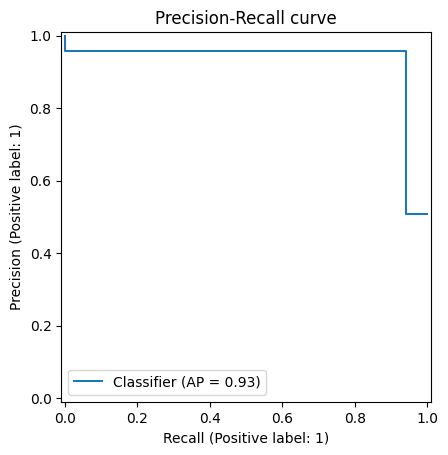

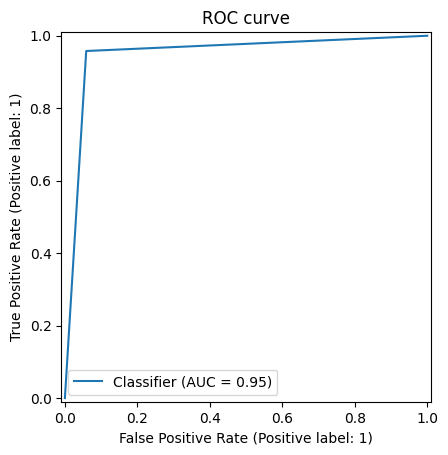

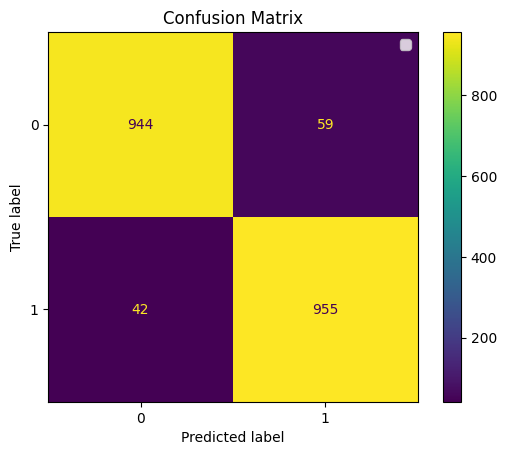

In [1]:
import mlflow
from mlflow_utils import get_mlflow_experiment,create_dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

experiment=get_mlflow_experiment(experiment_name='logging_experiment')
print(f'Name: {experiment.name}')

with mlflow.start_run(run_name='logging_images',experiment_id=experiment.experiment_id) as run:
        
        x,y=make_classification(n_samples=10000,n_features=50,n_informative=10,class_sep=1.0,random_state=22)
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=43)

        rfc=RandomForestClassifier(n_estimators=100,random_state=42)
        rfc.fit(xtrain,ytrain)

        y_pred=rfc.predict(xtest)


        # log the precision-recall curve
        fig_pr=plt.figure()
        roc_display=PrecisionRecallDisplay.from_predictions(ytest,y_pred,ax=plt.gca())
        plt.title('Precision-Recall curve')
        plt.legend()
        mlflow.log_figure(fig_pr,'metrics/precision_recall_curve.png')

        # log the ROC curve
        fig_roc=plt.figure()
        roc_display=RocCurveDisplay.from_predictions(y_pred,ytest,ax=plt.gca())
        plt.title('ROC curve')
        plt.legend()
        mlflow.log_figure(fig_roc,'metrics/roc_curve.png')

        # log the confusion matrix
        fig_cm=plt.figure()
        cm_display=ConfusionMatrixDisplay.from_predictions(y_pred,ytest,ax=plt.gca())
        plt.title('Confusion Matrix')
        plt.legend()
        mlflow.log_figure(fig_cm,'metrics/confusion_matrix.png')


        #Print info about the run
        print(f'run_id: {run.info.run_id}')
        print(f'experiment_id: {run.info.experiment_id}')
        print(f'status: {run.info.status}')
        print(f'start time: {run.info.start_time}')
        print(f'end time: {run.info.end_time}')
        print(f'lifecycle stage: {run.info.lifecycle_stage}')


# 9.logging models  

In [4]:
import mlflow 
from mlflow_utils import get_mlflow_experiment
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

experiment=get_mlflow_experiment(experiment_name='logging_experiment')
print(f'Name: {experiment.name}')

with mlflow.start_run(run_name='logging model autolog',experiment_id=experiment.experiment_id) as run:
    x,y=make_classification(n_samples=10000,n_features=50,n_informative=10,class_sep=1.0,random_state=22)
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=43)

    # log model parameters
    mlflow.autolog()
    rfc=RandomForestClassifier(n_estimators=100,random_state=42)
    rfc.fit(xtrain,ytrain)
    y_pred=rfc.predict(xtest)

    #print run info
    print(f'run_id : {run.info.run_id}')
    print(f'experiment_id : {run.info.experiment_id}')
    print(f'status: {run.info.status}')
    print(f'start Time: {run.info.start_time}')
    print(f'end Time : {run.info.end_time}')
    print(f'lifecycle_stage : {run.info.lifecycle_stage}')



2024/12/24 16:39:45 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.2, but the installed version is 1.6.0. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


Name: logging_experiment


2024/12/24 16:39:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


run_id : 5662972c684c444c927b36b57bab9649
experiment_id : 637476786088063623
status: RUNNING
start Time: 1735079985323
end Time : None
lifecycle_stage : active


In [3]:
# method 2 controlled model logging 
import mlflow 
from mlflow_utils import get_mlflow_experiment
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

experiment=get_mlflow_experiment(experiment_name='logging_experiment')
print(f'Name: {experiment.name}')

with mlflow.start_run(run_name='logging model_controlled',experiment_id=experiment.experiment_id) as run:
    x,y=make_classification(n_samples=10000,n_features=50,n_informative=10,class_sep=1.0,random_state=22)
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=43)

    
    rfc=RandomForestClassifier(n_estimators=100,random_state=42)
    rfc.fit(xtrain,ytrain)
    y_pred=rfc.predict(xtest)

    # log model parameters
    mlflow.sklearn.log_model(sk_model=rfc,artifact_path='random_forest_classifier')

    #print run info
    print(f'run_id : {run.info.run_id}')
    print(f'experiment_id : {run.info.experiment_id}')
    print(f'status: {run.info.status}')
    print(f'start Time: {run.info.start_time}')
    print(f'end Time : {run.info.end_time}')
    print(f'lifecycle_stage : {run.info.lifecycle_stage}')


Name: logging_experiment


2024/12/24 16:38:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


run_id : 9aa0b0218c3a43fda1854160c4821dc1
experiment_id : 637476786088063623
status: RUNNING
start Time: 1735079909621
end Time : None
lifecycle_stage : active


In [5]:
# specifing the framework is sklean 
import mlflow 
from mlflow_utils import get_mlflow_experiment
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

experiment=get_mlflow_experiment(experiment_name='logging_experiment')
print(f'Name: {experiment.name}')

with mlflow.start_run(run_name='logging model autolog',experiment_id=experiment.experiment_id) as run:
    x,y=make_classification(n_samples=10000,n_features=50,n_informative=10,class_sep=1.0,random_state=22)
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=43)

    # log model parameters
    mlflow.sklearn.autolog()
    rfc=RandomForestClassifier(n_estimators=100,random_state=42)
    rfc.fit(xtrain,ytrain)
    y_pred=rfc.predict(xtest)

    #print run info
    print(f'run_id : {run.info.run_id}')
    print(f'experiment_id : {run.info.experiment_id}')
    print(f'status: {run.info.status}')
    print(f'start Time: {run.info.start_time}')
    print(f'end Time : {run.info.end_time}')
    print(f'lifecycle_stage : {run.info.lifecycle_stage}')

2024/12/24 16:40:26 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.2, but the installed version is 1.6.0. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.


Name: logging_experiment
run_id : f94321bd32c84ff4bd70dedcc0e12ac8
experiment_id : 637476786088063623
status: RUNNING
start Time: 1735080026471
end Time : None
lifecycle_stage : active


# 10. model inference 

- method 1 - load the model from mlflow ui
- method 2 - load the model from local file 

In [19]:
# method 1 - load the model from mlflow ui
import mlflow 
from mlflow.models import infer_signature
from mlflow_utils import get_mlflow_experiment
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import pandas as pd 

x,y=make_classification(n_samples=1000,n_features=50,n_informative=5,n_redundant=5,random_state=42)
x=pd.DataFrame(x,columns=[f'feature_{i}' for i in range(50)])
y=pd.DataFrame(y,columns=['target'])

_,xtest,_,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

# load the model
model_uri = 'runs:/9aa0b0218c3a43fda1854160c4821dc1/random_forest_classifier'
rfc=mlflow.sklearn.load_model(model_uri=model_uri)

y_pred=rfc.predict(xtest)
y_pred=pd.DataFrame({'actual':ytest.values.ravel(),'prediction':y_pred})

print(y_pred)

     actual  prediction
0         1           1
1         0           1
2         0           0
3         0           0
4         0           0
..      ...         ...
195       1           1
196       1           0
197       1           1
198       1           1
199       1           0

[200 rows x 2 columns]


d:\anaconda\envs\mlops\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [22]:
# method 2 - load the model from local file 
run_id=file='9aa0b0218c3a43fda1854160c4821dc1'
model_uri=f'file:///d:/pythonProjects/MLOps_Krish_Naik/MLflow/step-by-step/mlruns/637476786088063623/{run_id}/artifacts/random_forest_classifier'
rfc=mlflow.sklearn.load_model(model_uri=model_uri)

y_pred=rfc.predict(xtest)
y_pred=pd.DataFrame({'actual':ytest.values.ravel(),'prediction':y_pred})
y_pred

d:\anaconda\envs\mlops\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,actual,prediction
0,1,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
195,1,1
196,1,0
197,1,1
198,1,1


# 11. nested runs
- when we are running multiple ml models and we need to track all the information in heirarchical structure  
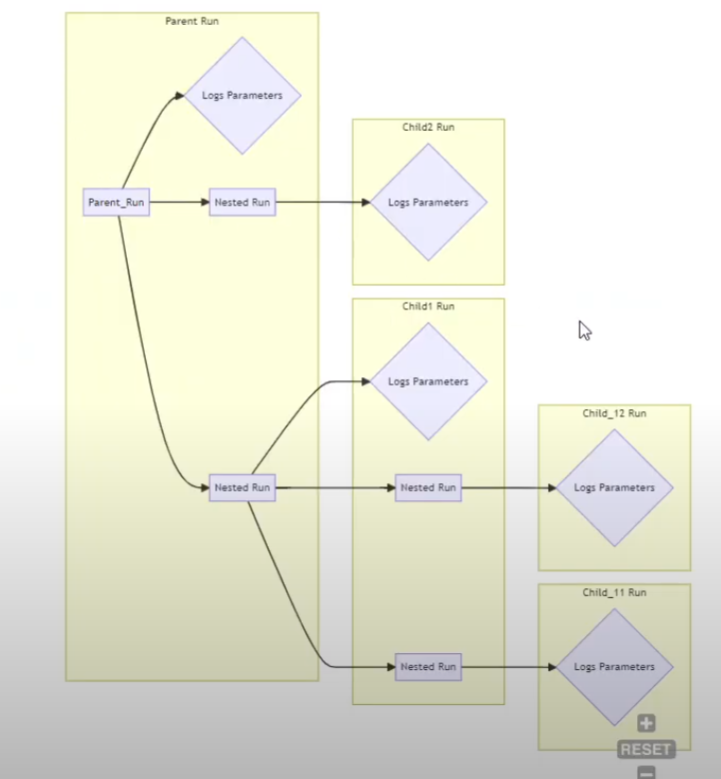

In [2]:
import mlflow 
from mlflow_utils import create_mlflow_experiment

experiment_id=create_mlflow_experiment(experiment_name='Nested Runs',artifact_location='nested_run_artifact',tags={'purpose':'learning'})

with mlflow.start_run(run_name='parent') as parent:
    print('RUN ID parent',parent.info.run_id)
    mlflow.log_param('parent_param','parent_value')

    with mlflow.start_run(run_name='child1',nested=True) as child1:
        print('RUN ID child1',child1.info.run_id)
        mlflow.log_param('child1_param','child1_value')

        with mlflow.start_run(run_name='child11',nested=True) as child_11:
            print('RUN ID child11',child_11.info.run_id)
            mlflow.log_param('child11_param','child11_value')

        with mlflow.start_run(run_name='child12',nested=True) as child_12:
            print('RUN ID child12',child_12.info.run_id)
            mlflow.log_param('child12_param','child12_value')
    
    
    with mlflow.start_run(run_name='child2',nested=True) as child_2:
            print('RUN ID child2',child_2.info.run_id)
            mlflow.log_param('child2_param','child2_value')



Experiment Nested Runs already exists
RUN ID parent 505ad8560adf48aea0bd929c91479a14
RUN ID child1 189118a7b16f42518c881560858021a4
RUN ID child11 39db05c9198b4ea9a6883f3fcff7f2f8
RUN ID child12 bcc129e972eb4362b67da353d57ce5d3
RUN ID child2 bd4628b9fd5141c686d289afbf4330a6


# 12. Log Custom Models
- mlflow doesnt support the framework
- we need to modify the model (create a wrapper around the model)

In [6]:
import mlflow 
from mlflow_utils import create_mlflow_experiment

class CustomModel(mlflow.pyfunc.PythonModel):
    def __init__(self):
        pass 
    def fit(self):
        print('fitting model ...')
    
    def predict(self,context,model_input:[str]):
        return self.get_prediction(model_input)
    
    def get_prediction(self,model_input:[str]):
        return " ".join([w.upper() for w in model_input])
    

experiment_id=create_mlflow_experiment(experiment_name='Custom Model', artifact_location='custom_model_artifact',tags={'purpose':'learning'})

with mlflow.start_run(run_name='custom_model_run') as run:
    custom_model=CustomModel()
    custom_model.fit()
    
    mlflow.pyfunc.log_model(artifact_path='custom_model',python_model=custom_model)

    mlflow.log_param('param1','value1')


    #load the model
    custom_model=mlflow.pyfunc.load_model(f'runs:/{run.info.run_id}/custom_model')
    prediction=custom_model.predict({'hello','world'})
    print(prediction)

2024/12/24 20:08:25 INFO mlflow.types.utils: Unsupported type hint: [<class 'str'>], skipping schema inference


Experiment Custom Model already exists
fitting model ...


2024/12/24 20:08:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


HELLO WORLD


# 13. model signature
- specify the data type, data shape the model can work with 
- the kind of output the model provides 
- method 1 - manual 
- method 2 - infer signature 

In [8]:
# method 1 
import mlflow 
from mlflow_utils import get_mlflow_experiment
from mlflow.models.signature import ModelSignature
from mlflow.models.signature import infer_signature
from mlflow.types.schema import Schema
from mlflow.types.schema import ParamSchema
from mlflow.types.schema import ParamSpec
from mlflow.types.schema import ColSpec
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd 
from typing import Tuple

def get_train_data()->Tuple[pd.DataFrame]:
    ''' 
    Generate train and test data.
    :return:xtrain,ytrain
    '''
    x,y=make_classification()
    features=[f'feature{i+1}' for i in range(x.shape[1])]
    df=pd.DataFrame(x,columns=features)
    df['label']=y

    return df[features],df['label']



x,y=get_train_data()
col_spec=[]
data_map={
    'int64': 'integer',
        'float64': 'double',
        'bool': 'boolean',
        'str': 'string',
        "date": 'datetime'
}
for name,dtype in x.dtypes.to_dict().items():
    col_spec.append(ColSpec(name=name,type=data_map[str(dtype)]))

input_schema=Schema(inputs=col_spec)
output_schema=Schema([ColSpec(name='label',type='integer')])

parameter = ParamSpec(name='model_name',dtype='string',default='model1')
param_schema=ParamSchema(params=[parameter])

model_signature=ModelSignature(inputs=input_schema,outputs=output_schema,params=param_schema)
print('Model Signature')
print(model_signature.to_dict())


experiment_id=create_mlflow_experiment( experiment_name="Model Signature",
        artifact_location="model_signature_artifacts",
        tags={"purpose": "learning"})

with mlflow.start_run(run_name="model_signature_run") as run:
        mlflow.sklearn.log_model(
            sk_model=RandomForestClassifier(),
            artifact_path="model_signature",
            signature=model_signature,
        )

Model Signature
{'inputs': '[{"type": "double", "name": "feature1", "required": true}, {"type": "double", "name": "feature2", "required": true}, {"type": "double", "name": "feature3", "required": true}, {"type": "double", "name": "feature4", "required": true}, {"type": "double", "name": "feature5", "required": true}, {"type": "double", "name": "feature6", "required": true}, {"type": "double", "name": "feature7", "required": true}, {"type": "double", "name": "feature8", "required": true}, {"type": "double", "name": "feature9", "required": true}, {"type": "double", "name": "feature10", "required": true}, {"type": "double", "name": "feature11", "required": true}, {"type": "double", "name": "feature12", "required": true}, {"type": "double", "name": "feature13", "required": true}, {"type": "double", "name": "feature14", "required": true}, {"type": "double", "name": "feature15", "required": true}, {"type": "double", "name": "feature16", "required": true}, {"type": "double", "name": "feature1

In [9]:
# method 2 
model_signature=infer_signature(x,y,params={'model_name':'model1'})
print('MODEL SIGNATURE')
print(model_signature.to_dict())

experiment_id=create_mlflow_experiment( experiment_name="Model Signature",
        artifact_location="model_signature_artifacts",
        tags={"purpose": "learning"})

with mlflow.start_run(run_name="model_signature_run") as run:
        mlflow.sklearn.log_model(
            sk_model=RandomForestClassifier(),
            artifact_path="model_signature",
            signature=model_signature,
        )

d:\anaconda\envs\mlops\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


MODEL SIGNATURE
{'inputs': '[{"type": "double", "name": "feature1", "required": true}, {"type": "double", "name": "feature2", "required": true}, {"type": "double", "name": "feature3", "required": true}, {"type": "double", "name": "feature4", "required": true}, {"type": "double", "name": "feature5", "required": true}, {"type": "double", "name": "feature6", "required": true}, {"type": "double", "name": "feature7", "required": true}, {"type": "double", "name": "feature8", "required": true}, {"type": "double", "name": "feature9", "required": true}, {"type": "double", "name": "feature10", "required": true}, {"type": "double", "name": "feature11", "required": true}, {"type": "double", "name": "feature12", "required": true}, {"type": "double", "name": "feature13", "required": true}, {"type": "double", "name": "feature14", "required": true}, {"type": "double", "name": "feature15", "required": true}, {"type": "double", "name": "feature16", "required": true}, {"type": "double", "name": "feature1

# 14. Serving Multiple models to a single serving endpoint

In [12]:
import mlflow 
from mlflow_utils import create_mlflow_experiment
from mlflow.models.signature import ModelSignature
from mlflow.models.signature import infer_signature
from mlflow.types import ColSpec
from mlflow.types import Schema
from mlflow.types import ParamSchema
from mlflow.types import ParamSpec
import numpy as np


class CustomModel(mlflow.pyfunc.PythonModel):
    
    def predict_model1(self,model_input):
        return 0* model_input
    def predict_model2(self,model_input):
        return model_input
    def predict_model3(self,model_input):
        return 2* model_input
    
    def predict(self,context,model_input,params):
        if params['model_name']=='model_1':
            return self.predict_model1(model_input=model_input)
        elif params['model_name']=='model_2':
            return self.predict_model2(model_input=model_input)
        elif params['model_name']=='model_3':
            return self.predict_model3(model_input=model_input)
        else:
            raise Exception('Model not Found')
        
experiment_id=create_mlflow_experiment(experiment_name='Custom Model',artifact_location='custom_model_multi_model',tags={'purpose':'learning'})

input_schema = Schema(inputs=[ColSpec(type="integer", name="input")])
output_schema = Schema(inputs=[ColSpec(type="integer", name="output")])
param_spec = ParamSpec(name="model_name", dtype="string", default=None)
param_schema = ParamSchema(params=[param_spec])
model_signature = ModelSignature(
    inputs=input_schema, outputs=output_schema, params=param_schema
)

with mlflow.start_run(run_name='custome model multiple models',experiment_id=experiment_id) as run:
    mlflow.pyfunc.log_model(artifact_path='model',python_model=CustomModel(),signature=model_signature)

    model_uri=f'runs:/{run.info.run_id}/model'
    loaded_model=mlflow.pyfunc.load_model(model_uri=model_uri)

    for i in range(3):
        print(f'prediction from model {i+1}')
        print(loaded_model.predict(data={'input':np.int32(10)},params={'model_name':f'model_{i+1}'}))
        print('\n')

    print(f'Run_id: {run.info.run_id}')

Experiment Custom Model already exists
prediction from model 1
   input
0      0


prediction from model 2
   input
0     10


prediction from model 3
   input
0     20


Run_id: 7529c2d825a24e2ba5de0db1a9b21d12


# most the model locally 
- mlflow models serve --model-uri runs:/7529c2d825a24e2ba5de0db1a9b21d12/model --no-conda 

In [19]:
import json 
import requests

data={
    'dataframe_split':{'columns':['input'],'data':[15]},
    'params':{'model_name':'model_1'},
}
headers={'Content-type':'application/json'}
endpoint='http://127.0.0.1:5000/invocations'

r=requests.post(endpoint,data=json.dumps(data),headers=headers)
print(r.status_code)
print(r.text)

200
{"predictions": [{"input": 0}]}


# 15. Model Registry 
- mechanism in mlflow for giving the model the attention it deserves
- record all the version of the model we are working on
#### what is mlflow registry?
- centralized model store - set of API's to colloborately manage full life cycle of a ml project
- model lineage - which run produced the model
- model versioning 
- stage transition - transitioning the model from staging to production 
- model annotations - include additonal metadata about the model 

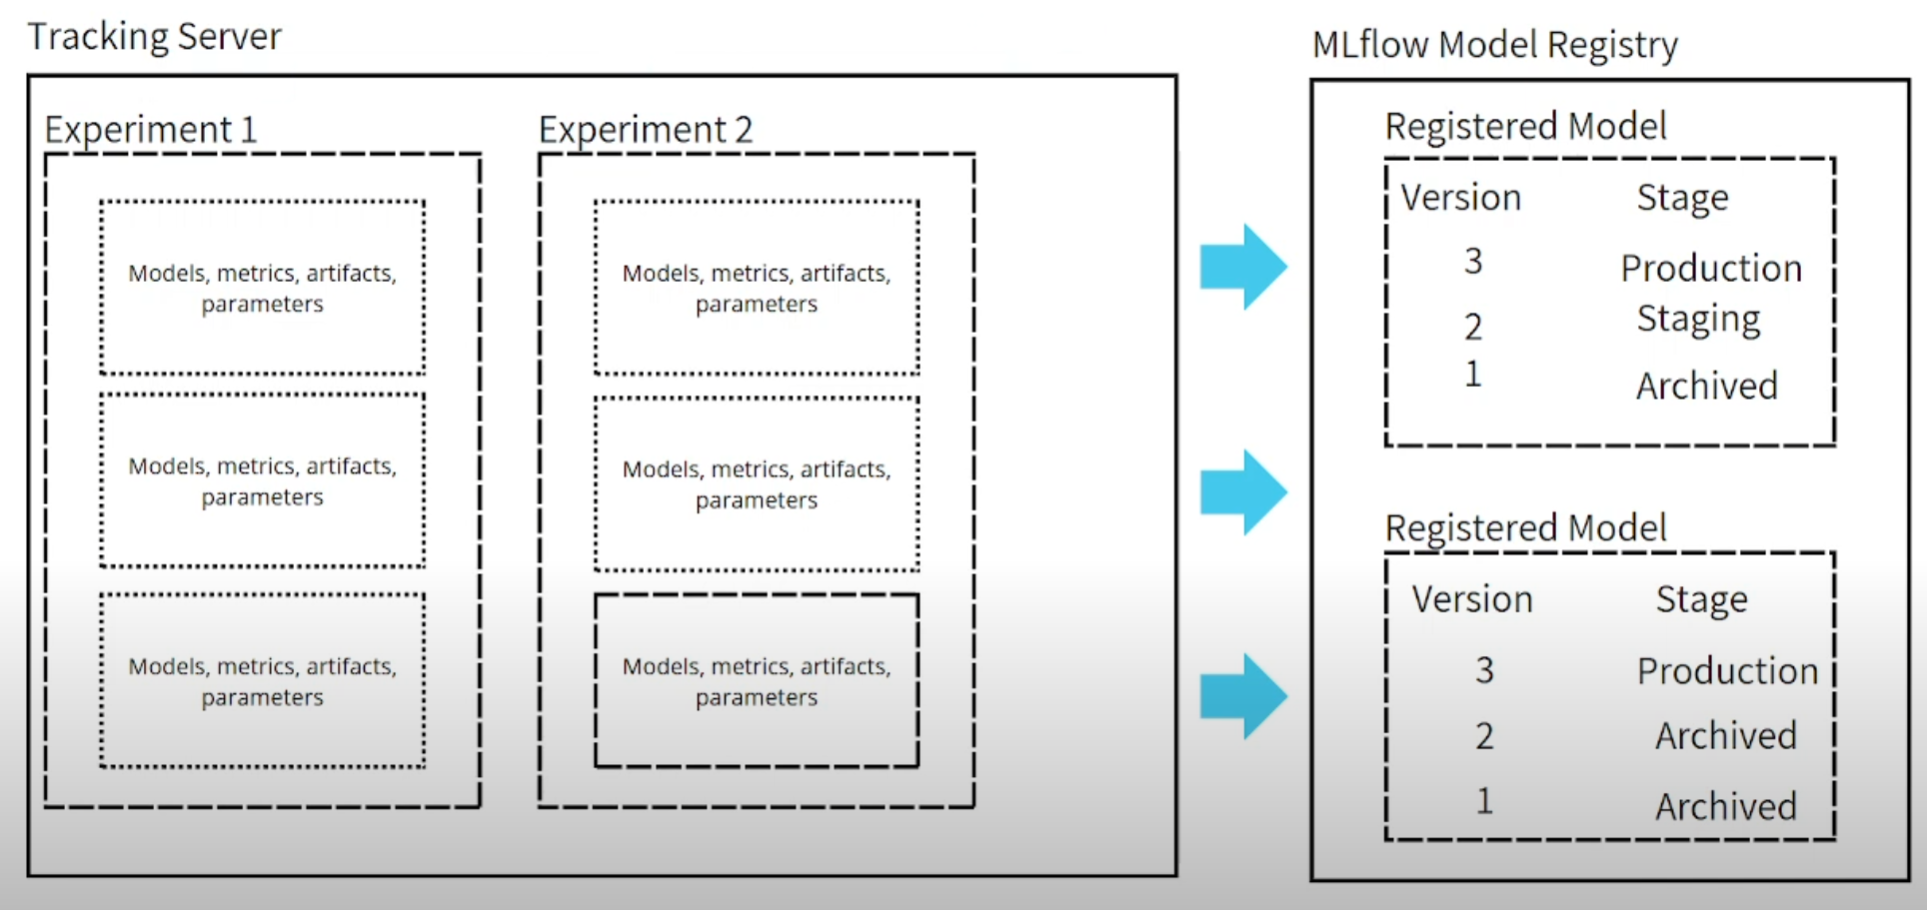
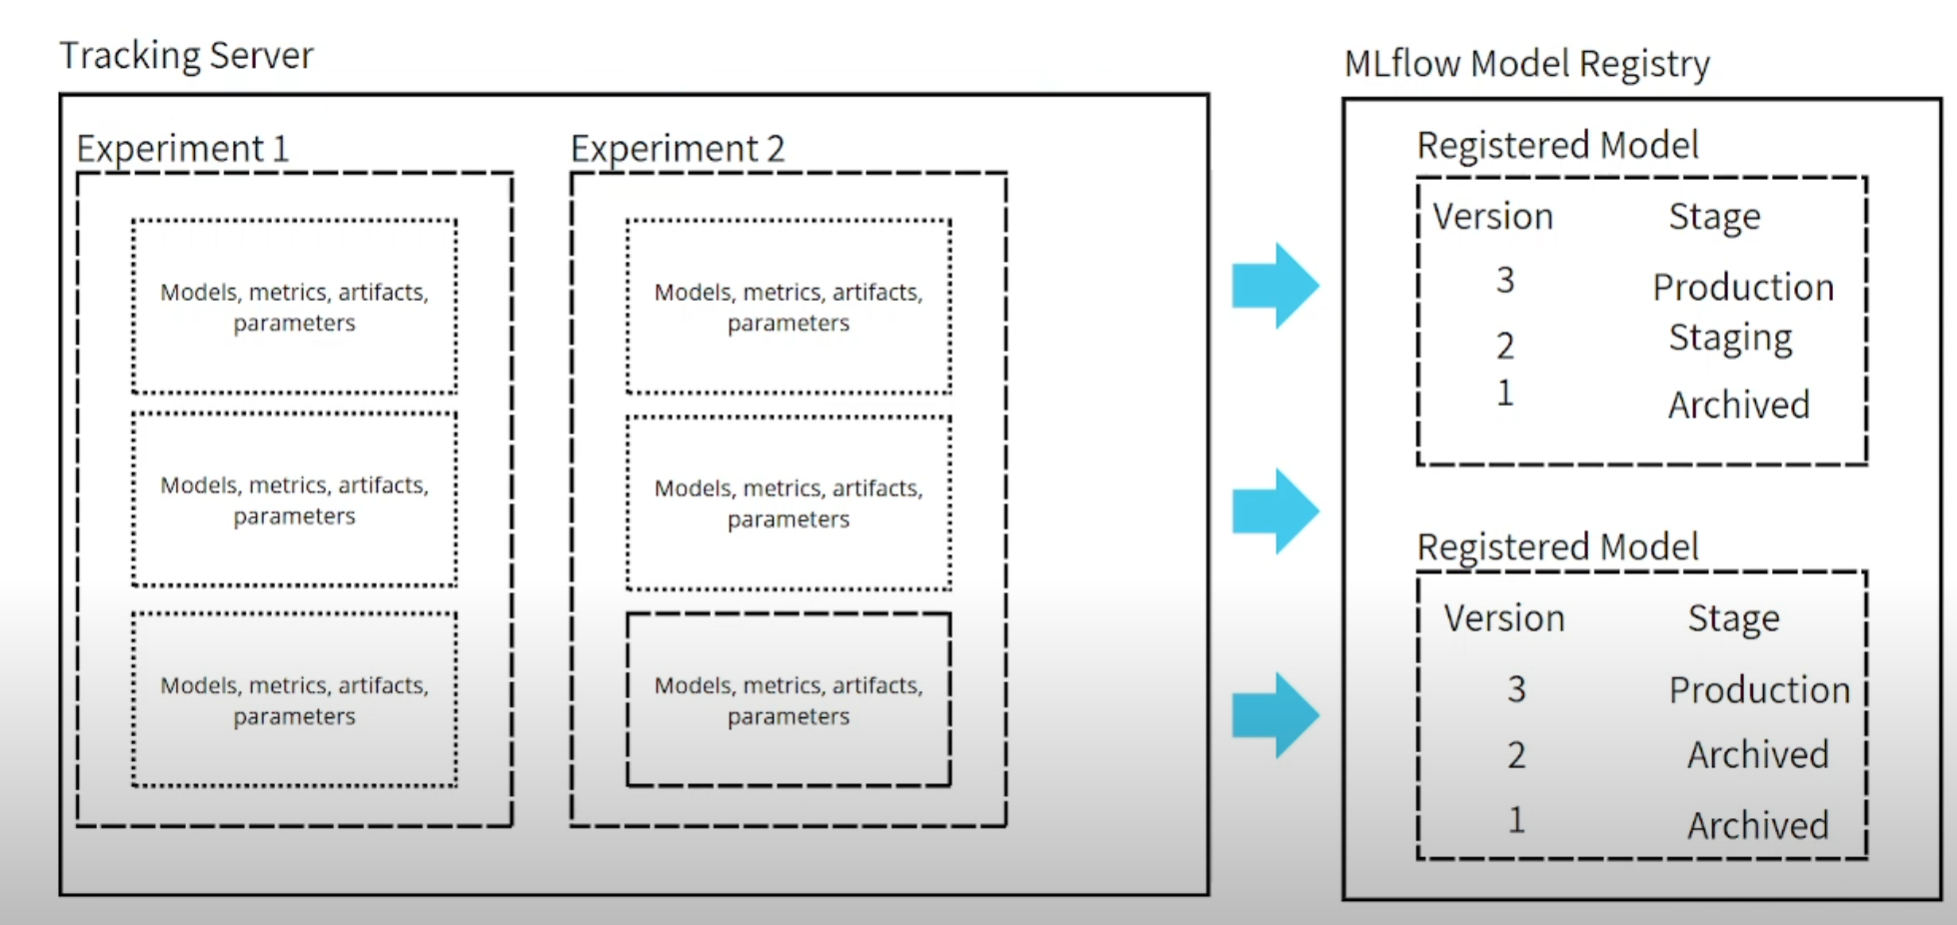

In [20]:
import mlflow
from sklearn.ensemble import RandomForestClassifier
from mlflow_utils import get_mlflow_experiment

class CustomModel(mlflow.pyfunc.PythonModel):
    def predict(self,context,model_input):
        return model_input
    
experiment_id=create_mlflow_experiment(experiment_name='model_Registry',artifact_location='model_registry_artifacts',tags={'purpose':'learning'})

with mlflow.start_run(run_name='model_registry') as run:
    model=CustomModel()
    mlflow.pyfunc.log_model(artifact_path='custom_model',python_model=model,registered_model_name='Custom_model')
    mlflow.sklearn.log_model(artifact_path='rfc model',sk_model=RandomForestClassifier(),registered_model_name='rfc model')
    mlflow.sklearn.log_model(artifact_path='rfc_model2',sk_model=RandomForestClassifier())

2024/12/25 10:15:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Custom_model'.
Created version '1' of model 'Custom_model'.
2024/12/25 10:15:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'rfc model'.
Created version '1' of model 'rfc model'.
2024/12/25 10:15:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


# different operations for model registry 
- create registered model
- create model version 
- create trainsition model 
- delete model version 
- delete registered model 


In [39]:
from mlflow_utils import create_mlflow_experiment
from mlflow import MlflowClient

experiment_id=create_mlflow_experiment(
    experiment_name='model_Registry',
    artifact_location='model_registry_artifacts',
    tags={'purpose','learning'}
)
print(experiment_id)

client=MlflowClient()
model_name='registered_model_2'

# create registeted model 
client.create_registered_model(model_name)

# create model version 
source='file:///d:/pythonProjects/MLOps_Krish_Naik/MLflow/step-by-step/model_registry_artifacts/c10d2d54d8564b589c2f51b22fd30d68/artifacts/rfc model/MLmodel' 
run_id='c10d2d54d8564b589c2f51b22fd30d68'
client.create_model_version(model_name,source=source,run_id=run_id)


# trainsition model version stage
client.transition_model_version_stage(name=model_name,version=1,stage='staging')
client.transition_model_version_stage(name=model_name,version=1,stage='production')
client.transition_model_version_stage(name=model_name,version=2,stage='archived')

# delete model version 
client.delete_model_version(name='registered_model_2',version=2)

# delete registered model 
client.delete_registered_model(name=model_name)

Experiment model_Registry already exists
None


# additional operations 
- add description to registered model/version 
- add tags to registered model/version 

In [44]:
model_name='registered_model_3'

# add description to the registerted model
client.update_registered_model(name=model_name,description='This is a test model')

# add tags to registered model 
client.set_registered_model_tag(name=model_name,key='tag1',value='value1')

# add tags to version models
client.update_model_version(name=model_name,description='This is a test model version 1',version=1)
client.set_model_version_tag(name=model_name,version=1,key='tag11',value='value11')
